<a href="https://colab.research.google.com/github/jeet1912/ms/blob/main/ds680/finalTermProject/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scipy import stats
from sklearn.metrics import roc_curve, auc

import requests
from bs4 import BeautifulSoup

# Sample Text

In [ ]:
url = "https://ia.samaltman.com/"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, "html.parser")
paragraphs = soup.find_all("p")

textCorpus = []
for paragraph in paragraphs:
  textCorpus.append(paragraph.text)

textCorpus = " ".join(textCorpus)
print(textCorpus[-100:])

st-forward a hundred years from today, the prosperity all around us would feel just as unimaginable.


# Char To ASCII

In [ ]:
def char_to_ascii(text):
  """Converts each character in a string to its ASCII value.

  Args:
    text: The input string.

  Returns:
    A list of ASCII values for each character in the string.
  """
  ascii_values = [ord(char) for char in text]
  return ascii_values

print(len(textCorpus))
print(textCorpus[:10])
asciiText = char_to_ascii(textCorpus)
print(asciiText[:10])
print(len(asciiText))

6347
In the nex
[73, 110, 32, 116, 104, 101, 32, 110, 101, 120]
6347


# Dataframe of Sentences in ASCII

In [ ]:
def createASCIISentences(ascii_text, dropPeriods=False):
  """Splits an array of ASCII codes by the period, creates a DataFrame
  with sentences including periods, and adds an ASCII representation column.

  Args:
    ascii_text: A NumPy array of ASCII codes.

  Returns:
    A Pandas DataFrame with columns 'Sentences' and 'ASCII Representation'.
  """

  # Split the array based on the ASCII code for period (46):
  split_indices = np.where(ascii_text == 46)[0]
  sentences_ascii = np.split(ascii_text, split_indices + 1)  # +1 to include the period

  # Keep the period in ASCII Representation:
  if dropPeriods:
    sentences_ascii = [sentence[:-1] for sentence in sentences_ascii if len(sentence) > 0]

  # Create a Pandas DataFrame:
  df = pd.DataFrame({'numericalRep': sentences_ascii})

  # Create the 'Sentences' column by converting ASCII to characters:
  df['Sentences'] = df['numericalRep'].apply(lambda x: "".join([chr(code) for code in x]))

  return df

# Example usage:
sentencesDf = createASCIISentences(np.array(asciiText))
print(sentencesDf.shape)
sentencesDf.head()

(44, 2)


,numericalRep,Sentences
0,"[73, 110, 32, 116, 104, 101, 32, 110, 101, 120...","In the next couple of decades, we will be able..."
1,"[32, 84, 104, 105, 115, 32, 112, 104, 101, 110...","This phenomenon is not new, but it will be ne..."
2,"[32, 80, 101, 111, 112, 108, 101, 32, 104, 97,...",People have become dramatically more capable ...
3,"[32, 87, 101, 32, 97, 114, 101, 32, 109, 111, ...",We are more capable not because of genetic ch...
4,"[32, 79, 117, 114, 32, 103, 114, 97, 110, 100,...",Our grandparents – and the generations that c...


In [ ]:
print(sentencesDf['numericalRep'][0])

[ 73 110  32 116 104 101  32 110 101 120 116  32  99 111 117 112 108 101
  32 111 102  32 100 101  99  97 100 101 115  44  32 119 101  32 119 105
 108 108  32  98 101  32  97  98 108 101  32 116 111  32 100 111  32 116
 104 105 110 103 115  32 116 104  97 116  32 119 111 117 108 100  32 104
  97 118 101  32 115 101 101 109 101 100  32 108 105 107 101  32 109  97
 103 105  99  32 116 111  32 111 117 114  32 103 114  97 110 100 112  97
 114 101 110 116 115  46]


In [ ]:
sentencesDf['Length'] = sentencesDf['numericalRep'].apply(len)
sentencesDf.head()

,numericalRep,Sentences,Length
0,"[73, 110, 32, 116, 104, 101, 32, 110, 101, 120...","In the next couple of decades, we will be able...",114
1,"[32, 84, 104, 105, 115, 32, 112, 104, 101, 110...","This phenomenon is not new, but it will be ne...",62
2,"[32, 80, 101, 111, 112, 108, 101, 32, 104, 97,...",People have become dramatically more capable ...,153
3,"[32, 87, 101, 32, 97, 114, 101, 32, 109, 111, ...",We are more capable not because of genetic ch...,238
4,"[32, 79, 117, 114, 32, 103, 114, 97, 110, 100,...",Our grandparents – and the generations that c...,96


In [ ]:
for i in range(44):
  print(sentencesDf['Sentences'][i])

In the next couple of decades, we will be able to do things that would have seemed like magic to our grandparents.
 This phenomenon is not new, but it will be newly accelerated.
 People have become dramatically more capable over time; we can already accomplish things now that our predecessors would have believed to be impossible.
 We are more capable not because of genetic change, but because we benefit from the infrastructure of society being way smarter and more capable than any one of us; in an important sense, society itself is a form of advanced intelligence.
 Our grandparents – and the generations that came before them – built and achieved great things.
 They contributed to the scaffolding of human progress that we all benefit from.
 AI will give people tools to solve hard problems and help us add new struts to that scaffolding that we couldn’t have figured out on our own.
 The story of progress will continue, and our children will be able to do things we can’t.
 It won’t happen 

# Key Observation
The text corpus, although written in a conversational style which has a certain informal words, it still has a mixture of the most common sentence structures in English.

In [ ]:
maxLen = sentencesDf['Length'].max()
dfPCA = pd.DataFrame(sentencesDf['numericalRep'].tolist(), columns=[f'd{i+1}' for i in range(maxLen)])
dfPCA.fillna(0, inplace=True)
dfPCA.head()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d390,d391,d392,d393,d394,d395,d396,d397,d398,d399
0,73.0,110.0,32.0,116.0,104.0,101.0,32.0,110.0,101.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.0,84.0,104.0,105.0,115.0,32.0,112.0,104.0,101.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.0,80.0,101.0,111.0,112.0,108.0,101.0,32.0,104.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,87.0,101.0,32.0,97.0,114.0,101.0,32.0,109.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32.0,79.0,117.0,114.0,32.0,103.0,114.0,97.0,110.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PCA Trick
### For a compressed repsentation of ASCII values of each sentence.  

(44, 399)


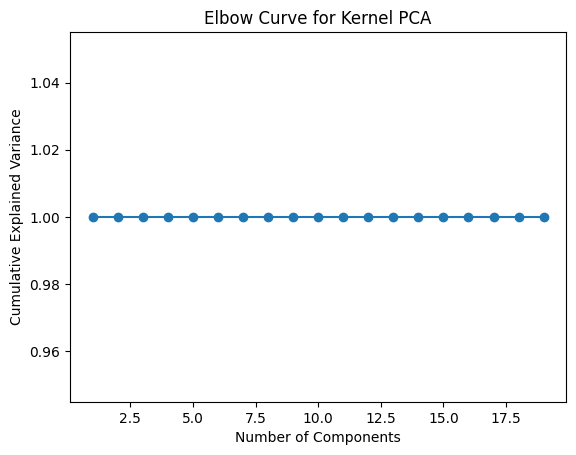

In [ ]:
X = dfPCA.values
print(X.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
explained_variances = []
n_components_range = range(1, 20)

for n_components in n_components_range:
  kpca = KernelPCA(n_components=n_components, kernel='cosine', random_state=33)
  X_kpca = kpca.fit_transform(X_scaled)
  explained_variance = np.var(X_kpca, axis=0)
  explained_variance_ratio = explained_variance / np.sum(explained_variance)
  explained_variances.append(np.sum(explained_variance_ratio))

plt.plot(n_components_range, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Curve for Kernel PCA')
plt.show()

In [ ]:
kpca_1 = KernelPCA(n_components=1, kernel='cosine', random_state=33)
X_kpca_1 = kpca_1.fit_transform(X_scaled)
sentencesDf['compressedNR_1'] = X_kpca_1

In [57]:
kpca_17 = KernelPCA(n_components=17, kernel='cosine', random_state=33)
X_kpca_17 = kpca_17.fit_transform(X_scaled)
sentencesDf['compressedNR_17'] = list(X_kpca_17)

In [58]:
sentencesDf.head()

,numericalRep,Sentences,Length,compressedNR_1,compressedNR_17
0,"[73, 110, 32, 116, 104, 101, 32, 110, 101, 120...","In the next couple of decades, we will be able...",114,-0.339862,"[-0.33986159518241554, -0.24261905045330004, 0..."
1,"[32, 84, 104, 105, 115, 32, 112, 104, 101, 110...","This phenomenon is not new, but it will be ne...",62,-0.554093,"[-0.5540928369619159, 0.47304897020995895, -0...."
2,"[32, 80, 101, 111, 112, 108, 101, 32, 104, 97,...",People have become dramatically more capable ...,153,0.292459,"[0.2924588528612866, -0.3703582590241638, -0.1..."
3,"[32, 87, 101, 32, 97, 114, 101, 32, 109, 111, ...",We are more capable not because of genetic ch...,238,0.582195,"[0.5821946051117605, 0.4714013994209056, 0.427..."
4,"[32, 79, 117, 114, 32, 103, 114, 97, 110, 100,...",Our grandparents – and the generations that c...,96,-0.463337,"[-0.46333658697465285, 0.13479556439296272, 0...."


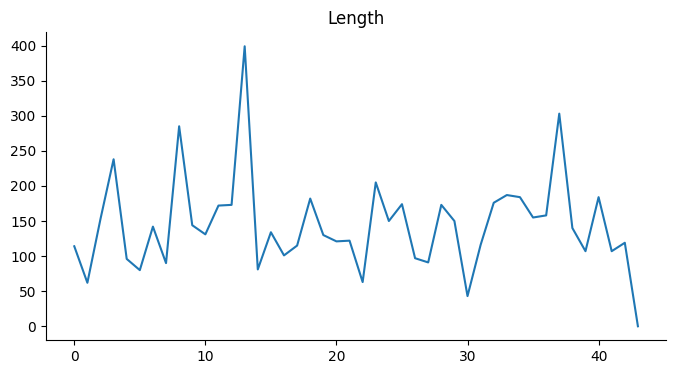

In [ ]:
# @title Length

from matplotlib import pyplot as plt
sentencesDf['Length'].plot(kind='line', figsize=(8, 4), title='Length')
plt.gca().spines[['top', 'right']].set_visible(False)

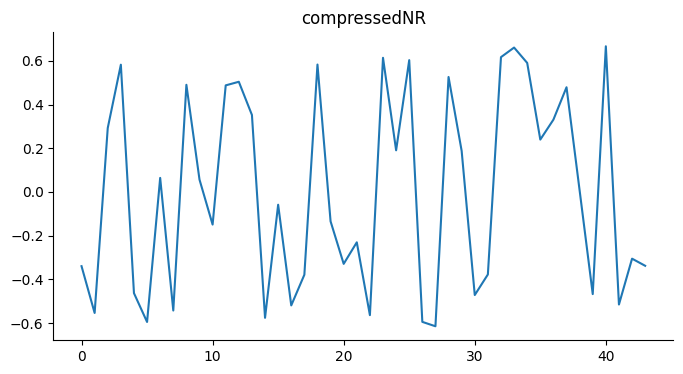

In [ ]:
# @title compressedNR

from matplotlib import pyplot as plt
sentencesDf['compressedNR'].plot(kind='line', figsize=(8, 4), title='compressedNR')
plt.gca().spines[['top', 'right']].set_visible(False)

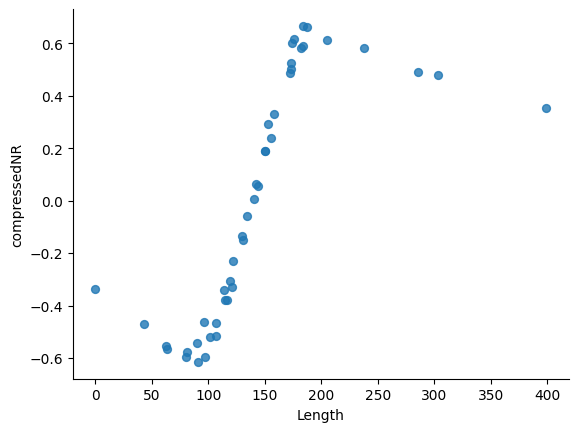

In [ ]:
# @title Length vs compressedNR

from matplotlib import pyplot as plt
sentencesDf.plot(kind='scatter', x='Length', y='compressedNR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# ASCII codes for Lexical Cateogries

In [64]:
avolc = pd.read_csv('/content/drive/MyDrive/ds680/reducedASCIIofLexCats.csv')
#aciivaluesoflexicalcategories
print(avolc.shape)
avolc.head()

(17, 3)


,lexCat,lexASCII,reducedASCII
0,Abbreviation,"[65, 98, 98, 114, 101, 118, 105, 97, 116, 105,...",0.715901
1,Adjective,"[65, 100, 106, 101, 99, 116, 105, 118, 101]",0.286725
2,Adposition,"[65, 100, 112, 111, 115, 105, 116, 105, 111, 110]",0.664445
3,Adverb,"[65, 100, 118, 101, 114, 98]",-0.592642
4,Affix,"[65, 102, 102, 105, 120]",-0.593880


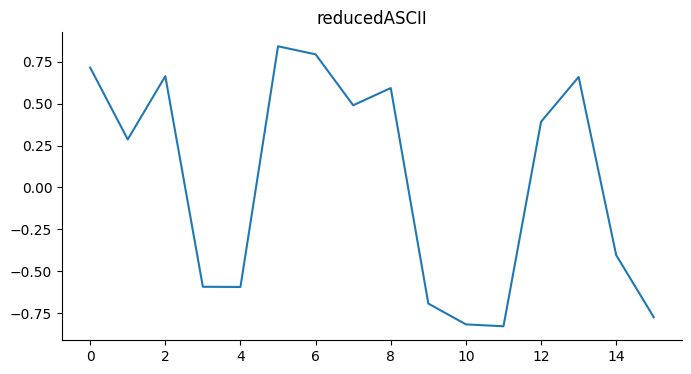

In [ ]:
# @title reducedASCII

from matplotlib import pyplot as plt
avolc['reducedASCII'].plot(kind='line', figsize=(8, 4), title='reducedASCII')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
lexCat = avolc['lexCat'].tolist()
print(lexCat)

['Abbreviation', 'Adjective', 'Adposition', 'Adverb', 'Affix', 'Conjunction', 'Contraction', 'Determiner', 'Interjection', 'Noun', 'Other', 'Phrase', 'Predeterminer', 'Preposition', 'Pronoun', 'Symbol', 'Verb']


In [66]:
lexCatInRA = np.array(avolc['reducedASCII'].tolist())
print(lexCatInRA)

[ 0.71590091  0.2867249   0.66444542 -0.592642   -0.59387992  0.84275472
  0.79462763  0.49076816  0.59344712 -0.69295269 -0.81704743 -0.82846908
  0.39217374  0.659702   -0.40400667 -0.73709869 -0.77444813]


In [67]:
sentencesDf['dotProduct'] = sentencesDf['compressedNR_17'].apply(lambda x: np.dot(x, lexCatInRA))

In [68]:
sentencesDf.head()

,numericalRep,Sentences,Length,compressedNR_1,compressedNR_17,dotProduct
0,"[73, 110, 32, 116, 104, 101, 32, 110, 101, 120...","In the next couple of decades, we will be able...",114,-0.339862,"[-0.33986159518241554, -0.24261905045330004, 0...",-0.139878
1,"[32, 84, 104, 105, 115, 32, 112, 104, 101, 110...","This phenomenon is not new, but it will be ne...",62,-0.554093,"[-0.5540928369619159, 0.47304897020995895, -0....",-0.681388
2,"[32, 80, 101, 111, 112, 108, 101, 32, 104, 97,...",People have become dramatically more capable ...,153,0.292459,"[0.2924588528612866, -0.3703582590241638, -0.1...",0.624758
3,"[32, 87, 101, 32, 97, 114, 101, 32, 109, 111, ...",We are more capable not because of genetic ch...,238,0.582195,"[0.5821946051117605, 0.4714013994209056, 0.427...",0.634643
4,"[32, 79, 117, 114, 32, 103, 114, 97, 110, 100,...",Our grandparents – and the generations that c...,96,-0.463337,"[-0.46333658697465285, 0.13479556439296272, 0....",-0.512476


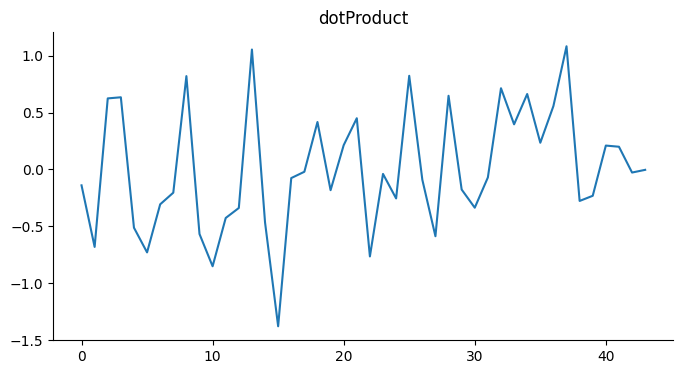

In [71]:
# @title dotProduct

from matplotlib import pyplot as plt
sentencesDf['dotProduct'].plot(kind='line', figsize=(8, 4), title='dotProduct')
plt.gca().spines[['top', 'right']].set_visible(False)

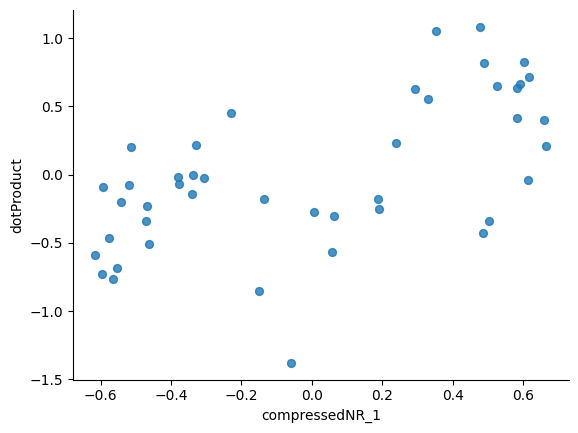

In [70]:
# @title compressedNR_1 vs dotProduct

from matplotlib import pyplot as plt
sentencesDf.plot(kind='scatter', x='compressedNR_1', y='dotProduct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

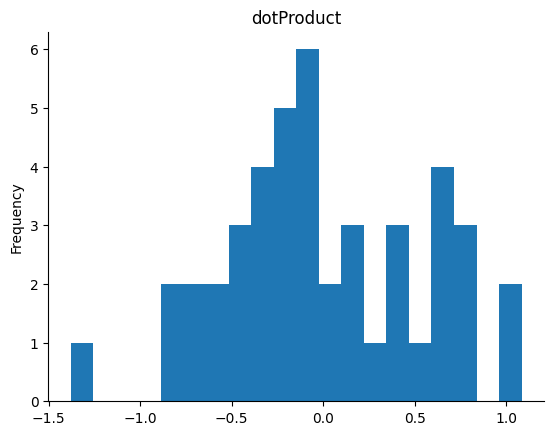

In [69]:
# @title dotProduct

from matplotlib import pyplot as plt
sentencesDf['dotProduct'].plot(kind='hist', bins=20, title='dotProduct')
plt.gca().spines[['top', 'right',]].set_visible(False)

okay, WOW.